# User Input
Please input your values into each of the labeled variables below - the results for whether you are predicted to get a loan will be shown at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Decide if highly correlated columns should be dropped:
drop_cols = ""
while (drop_cols.lower() != "yes" and drop_cols.lower() != "no"):
    drop_cols = input("Should highly correlated columns from the original dataset be kept? Input either \"Yes\" or \"No\". Selecting \"No\" may reduce model accuracy. ")

# Requested loan amount (input a numerical value representing the desired amount in USD):
loan_amount = float(input("\nHow large of a loan do you want in USD? Input a numerical value. $")) # e.g. 172232.47

# Requested loan term (input a numerical value representing the number of years for the loan):
loan_term = float(input("How many years is your desired loan term? Input a numerical value. ")) # e.g. 12

# Number of Dependents (input a numerical value reoresenting how many dependents you have):
num_dependents = float(input("How many dependents do you have? Input a numerical value. ")) # e.g. 5

# Education Status (input "Yes" if you are a college graduate, "No" if you are not):
education = 0
educated = ""
while (educated.lower() != "yes" and educated.lower() != "no"):
    educated = input("Have you graduated from college? Input either \"Yes\" or \"No\" ") # e.g. Yes
    if (educated.lower() == "yes"):
        education = 1

# Self-Employment (input "Yes" if you are self-employed, "No" if you are not):
self_employment = 0
self_employed = ""
while (self_employed.lower() != "yes" and self_employed.lower() != "no"):
    self_employed = input("Are you self employed? Input either \"Yes\" or \"No\" ") # e.g. No
    if (self_employed.lower() == "yes"):
        self_employment = 1

# Credit Score (input a numerical value representing your current credit score)
if (drop_cols.lower() == "yes"):
    credit_score = float(input("What is your current credit score? Input a numerical value. ")) # e.g. 652

# Annual Income (input a numerical value represeting your annual income value in USD):
if (drop_cols.lower() == "yes"):
    annual_income = float(input("What is your annual income in USD? Input a numerical value. $")) # e.g. 74319.49

# Residential Assets (input a numerical value represeting the value of your residential assets in USD)
residential_assets = float(input("What is the value of your residential assets in USD? Input a numerical value. $")) # e.g. 121506

# Commerical Assets (input a numerical value represeting the value of your commercial assets in USD)
commercial_assets = float(input("What is the value of your commerical assets in USD? Input a numerical value. $")) # e.g. 41288.61

# Luxury Assets (input a numerical value represeting the value of your luxury assets in USD)
if (drop_cols.lower() == "yes"):
    luxury_assets = float(input("What is the value of your luxury assets in USD? Input a numerical value. $")) # e.g. 277223.50

# Bank Value Assets (input a numerical value represeting the value of your bank value assets in USD)
if (drop_cols.lower() == "yes"):
    bank_value_assets = float(input("What is the value of your bank value assets in USD? Input a numerical value. $")) # e.g. 69600.79

In [3]:
# Create array from user information
user_input = []
if (drop_cols.lower() == "yes"):
    user_input = np.array([[0, num_dependents, education, self_employment, annual_income, loan_amount, loan_term, 
                        credit_score, residential_assets, commercial_assets, luxury_assets, bank_value_assets]])
else:    
    user_input = np.array([[0, num_dependents, education, self_employment, loan_amount, loan_term, residential_assets, commercial_assets]])

# Preprocessing

In [4]:
# creating dataframe
loan_df = pd.read_csv('loan_approval_dataset.csv')
loan_df.rename(columns={' no_of_dependents':'no_of_dependents'}, inplace=True)
loan_df.rename(columns={' education':'education'}, inplace=True)
loan_df.rename(columns={' self_employed':'self_employed'}, inplace=True)
loan_df.rename(columns={' income_annum':'income_annum'}, inplace=True)
loan_df.rename(columns={' loan_amount':'loan_amount'}, inplace=True)
loan_df.rename(columns={' loan_term':'loan_term'}, inplace=True)
loan_df.rename(columns={' cibil_score':'cibil_score'}, inplace=True)
loan_df.rename(columns={' residential_assets_value':'residential_assets_value'}, inplace=True)
loan_df.rename(columns={' commercial_assets_value':'commercial_assets_value'}, inplace=True)
loan_df.rename(columns={' luxury_assets_value':'luxury_assets_value'}, inplace=True)
loan_df.rename(columns={' bank_asset_value':'bank_asset_value'}, inplace=True)
loan_df.rename(columns={' loan_status':'loan_status'}, inplace=True)

In [5]:
# encoding education and self-employed, and status categories
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(loan_df['education'])
list(le.classes_)
labeled_education = le.transform(loan_df['education'])
loan_df['education'] = labeled_education

le.fit(loan_df['self_employed'])
list(le.classes_)
labeled_self_employed = le.transform(loan_df['self_employed'])
loan_df['self_employed'] = labeled_self_employed

le.fit(loan_df['loan_status'])
list(le.classes_)
labeled_loan_status = le.transform(loan_df['loan_status'])
loan_df['loan_status'] = labeled_loan_status

In [6]:
# converting from rupees to USD
loan_df['income_annum'] = loan_df['income_annum'] * 0.012
loan_df['loan_amount'] = loan_df['loan_amount'] * 0.012
loan_df['residential_assets_value'] = loan_df['residential_assets_value'] * 0.012
loan_df['commercial_assets_value'] = loan_df['commercial_assets_value'] * 0.012
loan_df['luxury_assets_value'] = loan_df['luxury_assets_value'] * 0.012
loan_df['residential_assets_value'] = loan_df['residential_assets_value'] * 0.012
loan_df['bank_asset_value'] = loan_df['bank_asset_value'] * 0.012

In [7]:
# capping credit score at 850
high_credit_inds = loan_df.index[loan_df['cibil_score'] > 850]
loan_df.loc[high_credit_inds, 'cibil_score'] = 850

<Axes: >

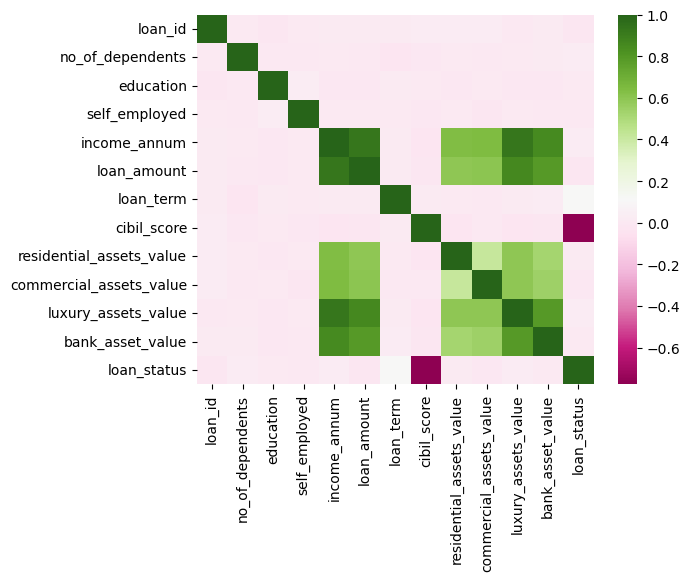

In [8]:
# checking for correlations
import seaborn as sns

loan_corr = loan_df.corr()
sns.heatmap(loan_corr, cmap="PiYG")

In [9]:
# dropping correlated columns
if drop_cols.lower() == "no":
    loan_df = loan_df.drop('income_annum', axis=1)
    loan_df = loan_df.drop('luxury_assets_value', axis=1)
    loan_df = loan_df.drop('bank_asset_value', axis=1)
    loan_df = loan_df.drop('cibil_score', axis=1)

In [10]:
# scaling dataset with standard scaler
from sklearn.preprocessing import StandardScaler

X = loan_df.drop('loan_status', axis = 1)
y = loan_df['loan_status']

standard_scale = StandardScaler()
standard_scale.fit(X)
loan_scaled = standard_scale.transform(X)

In [11]:
# balancing classes with SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_balanced, y_balanced = sm.fit_resample(loan_scaled, y)
y_balanced.value_counts()

loan_status
0    2656
1    2656
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split # splitting data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, train_size=0.8, test_size=0.2, random_state=42)

# KNN Code:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

KNN CLASSIFIER:
Accuracy: 0.9143932267168391 
Precision: 0.9160973463066431 
Recall: 0.9143932267168391 
F1 Score: 0.9141219133599248 



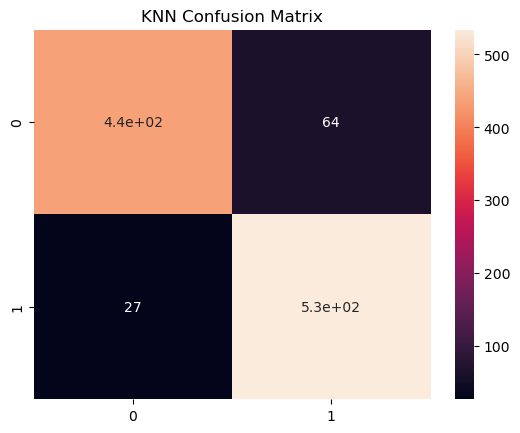

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix;
import seaborn as sb
import matplotlib.pyplot as plt

# Confusion Matrix:
knn_cm = confusion_matrix(y_test, pred_knn);
# Accuracy:
knn_accuracy = accuracy_score(y_test, pred_knn);
# Precision:
knn_precision = precision_score(y_test, pred_knn, average='weighted');
# Recall:
knn_recall = recall_score(y_test, pred_knn, average='weighted');
# F1 Score:
knn_f1 = f1_score(y_test, pred_knn, average='weighted');

print('KNN CLASSIFIER:\nAccuracy:', knn_accuracy, '\nPrecision:', knn_precision, 
      '\nRecall:', knn_recall, '\nF1 Score:', knn_f1, '\n');

sb.heatmap(knn_cm, annot=True)
plt.title("KNN Confusion Matrix")
plt.show()

# Decision Tree Code:

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

In [16]:
dtc = DecisionTreeClassifier(random_state=42)

In [17]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
pred_dtc = dtc.predict(X_test)

Decision Tree Metrics:
Accuracy: 0.9689557855126999
Precision: 0.9690136194216961
Recall: 0.9689557855126999
F1 Score: 0.9689632225524059


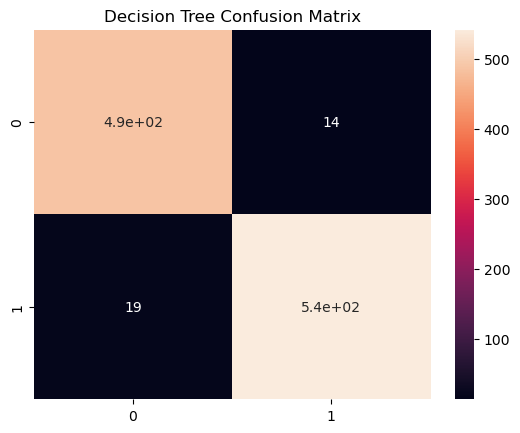

In [19]:
# Confusion Matrix:
dtc_cm = confusion_matrix(y_test, pred_dtc);
# Accuracy:
dtc_accuracy = accuracy_score(y_test, pred_dtc);
# Precision:
dtc_precision = precision_score(y_test, pred_dtc, average='weighted');
# Recall:
dtc_recall = recall_score(y_test, pred_dtc, average='weighted');
# F1 Score:
dtc_f1 = f1_score(y_test, pred_dtc, average='weighted');

print(f"Decision Tree Metrics:\nAccuracy: {dtc_accuracy}\nPrecision: {dtc_precision}\nRecall: {dtc_recall}\nF1 Score: {dtc_f1}")
sb.heatmap(dtc_cm, annot=True)
plt.title("Decision Tree Confusion Matrix")
plt.show()

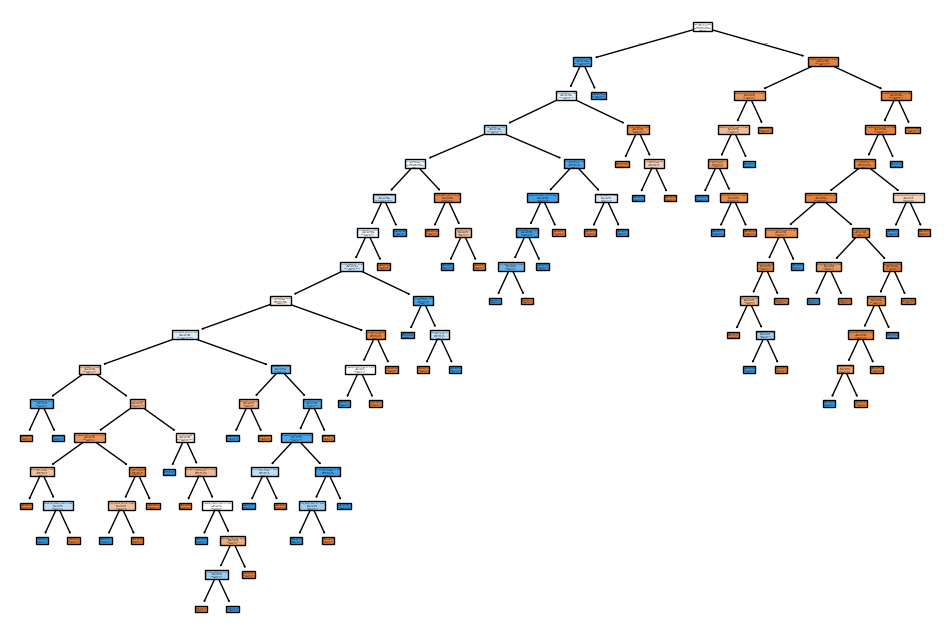

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dtc, feature_names=loan_df.columns[:-1], class_names=dtc.classes_.astype(str), filled=True)
plt.show()

# Logistic Regression Code:

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
pred_lr = log.predict(X_test)

Logistic Regression Metrics:
Accuracy: 0.9238005644402634
Precision: 0.9237940859993353
Recall: 0.9238005644402634
F1 Score: 0.923796505409756


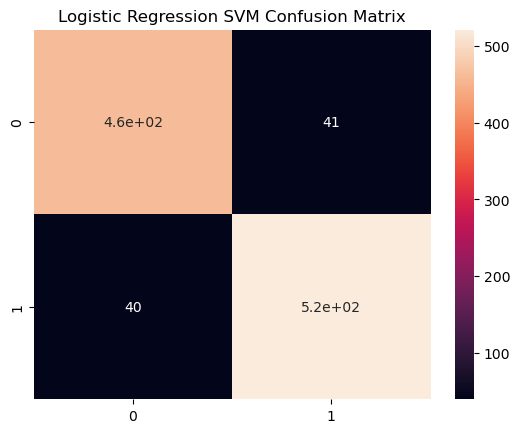

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Confusion Matrix:
lr_cm = confusion_matrix(y_test, pred_lr);
# Accuracy:
lr_accuracy = accuracy_score(y_test, pred_lr);
# Precision:
lr_precision = precision_score(y_test, pred_lr, average='weighted');
# Recall:
lr_recall = recall_score(y_test, pred_lr, average='weighted');
# F1 Score:
lr_f1 = f1_score(y_test, pred_lr, average='weighted');

print(f"Logistic Regression Metrics:\nAccuracy: {lr_accuracy}\nPrecision: {lr_precision}\nRecall: {lr_recall}\nF1 Score: {lr_f1}")
sb.heatmap(lr_cm, annot=True)
plt.title("Logistic Regression SVM Confusion Matrix")
plt.show()

# SVM Code:

In [23]:
from sklearn import svm
svm_svc = svm.SVC(kernel='linear')
svm_svc.fit(X_train, y_train)
pred_svm = svm_svc.predict(X_test)

Support Vector Machine Metrics:
Accuracy: 0.9350893697083725
Precision: 0.9354217927339298
Recall: 0.9350893697083725
F1 Score: 0.9350147699427303


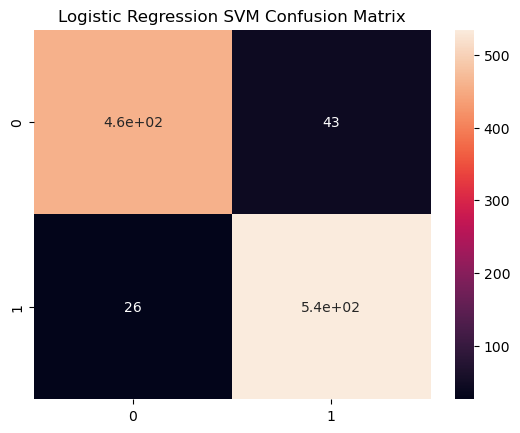

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Confusion Matrix:
svm_cm = confusion_matrix(y_test, pred_svm);
# Accuracy:
svm_accuracy = accuracy_score(y_test, pred_svm);
# Precision:
svm_precision = precision_score(y_test, pred_svm, average='weighted');
# Recall:
svm_recall = recall_score(y_test, pred_svm, average='weighted');
# F1 Score:
svm_f1 = f1_score(y_test, pred_svm, average='weighted');

print(f"Support Vector Machine Metrics:\nAccuracy: {svm_accuracy}\nPrecision: {svm_precision}\nRecall: {svm_recall}\nF1 Score: {svm_f1}")
sb.heatmap(svm_cm, annot=True)
plt.title("Logistic Regression SVM Confusion Matrix")
plt.show()

# Ensemble Learning Code:

## Averaging Method

In [25]:
pred_avg = (pred_knn + pred_dtc + pred_lr + pred_svm)/4.0
pred_avg = [1 if pred > 0.5 else 0 for pred in pred_avg]

Averaging Method - Ensemble Learning Metrics:
Accuracy: 0.9416745061147695
Precision: 0.947935368043088
Recall: 0.9411764705882353
F1 Score: 0.9445438282647585


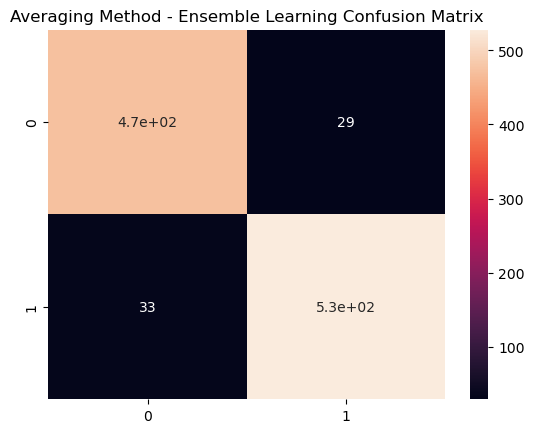

In [26]:
avg_cm = confusion_matrix(y_test, pred_avg);
avg_accuracy = accuracy_score(y_test, pred_avg)
avg_precision = precision_score(y_test, pred_avg)
avg_recall = recall_score(y_test, pred_avg)
avg_f1 = f1_score(y_test, pred_avg)

print(f"Averaging Method - Ensemble Learning Metrics:\nAccuracy: {avg_accuracy}\nPrecision: {avg_precision}\nRecall: {avg_recall}\nF1 Score: {avg_f1}")
sb.heatmap(avg_cm, annot=True)
plt.title("Averaging Method - Ensemble Learning Confusion Matrix")
plt.show()

## Stacking:

In [27]:
# Redefine classifiers
new_knn = KNeighborsClassifier(n_neighbors=5)
new_dtc = DecisionTreeClassifier(random_state=42)
new_log = LogisticRegression()
new_svm = svm.SVC(kernel='linear')

Stacking Method - Ensemble Learning Metrics:
Accuracy: 0.9708372530573848
Precision: 0.9783393501805054
Recall: 0.966131907308378
F1 Score: 0.9721973094170404


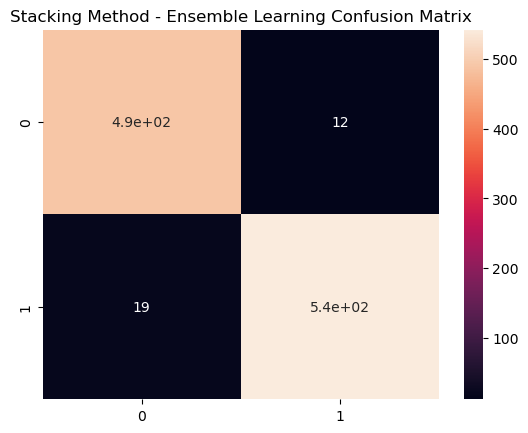

In [28]:
from sklearn.ensemble import StackingClassifier

# Computing stack features
stacking = StackingClassifier(
    estimators=[
        ('knn', new_knn),
        ('dtc', new_dtc),
        ('log', new_log),
        ('svm', new_svm)
    ],
)

# Fitting the model
stacking.fit(X_train, y_train)
 
# Predicting the output using stacking
pred_stack = stacking.predict(X_test)

# Evaluate the model
stack_cm = confusion_matrix(y_test, pred_stack);
stack_accuracy = accuracy_score(y_test, pred_stack)
stack_precision = precision_score(y_test, pred_stack)
stack_recall = recall_score(y_test, pred_stack)
stack_f1 = f1_score(y_test, pred_stack)

print(f"Stacking Method - Ensemble Learning Metrics:\nAccuracy: {stack_accuracy}\nPrecision: {stack_precision}\nRecall: {stack_recall}\nF1 Score: {stack_f1}")
sb.heatmap(stack_cm, annot=True)
plt.title("Stacking Method - Ensemble Learning Confusion Matrix")
plt.show()

## Bagging (alongside Voting):

Stacking Method - Ensemble Learning Metrics:
Accuracy: 0.9567262464722484
Precision: 0.9493891797556719
Recall: 0.9696969696969697
F1 Score: 0.9594356261022927


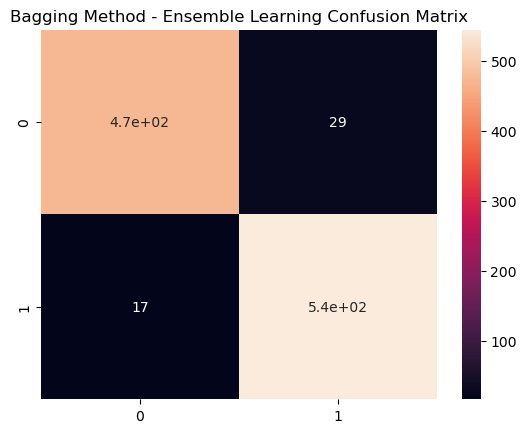

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Create bagging classifiers for each base model
bag_knn = BaggingClassifier(estimator=new_knn, n_estimators=5)
bag_dtc = BaggingClassifier(estimator=new_dtc, n_estimators=5)
bag_log = BaggingClassifier(estimator=new_log, n_estimators=5)
bag_svm = BaggingClassifier(estimator=new_svm, n_estimators=5)

# Average the results of each calculated bagging classifier using the Voting method
bag_avg = VotingClassifier(
    estimators=[
        ('bag_knn', bag_knn),
        ('bag_dtc', bag_dtc),
        ('bag_log', bag_log),
        ('bag_svm', bag_svm)
    ],
    voting='soft'
)

# Fitting the model
bag_avg.fit(X_train, y_train)
 
# Predicting the output using stacking
pred_bag = bag_avg.predict(X_test)

# Evaluate the model
bag_cm = confusion_matrix(y_test, pred_bag);
bag_accuracy = accuracy_score(y_test, pred_bag)
bag_precision = precision_score(y_test, pred_bag)
bag_recall = recall_score(y_test, pred_bag)
bag_f1 = f1_score(y_test, pred_bag)
    
print(f"Stacking Method - Ensemble Learning Metrics:\nAccuracy: {bag_accuracy}\nPrecision: {bag_precision}\nRecall: {bag_recall}\nF1 Score: {bag_f1}")
sb.heatmap(bag_cm, annot=True)
plt.title("Bagging Method - Ensemble Learning Confusion Matrix")
plt.show()

In [30]:
import sklearn
print(sklearn.__version__)

1.5.2


# Boosting (Adaboost)

AdaBoost Metrics:
Accuracy: 0.9708372530573848
Precision: 0.9681978798586572
Recall: 0.9768270944741533
F1 Score: 0.9724933451641526


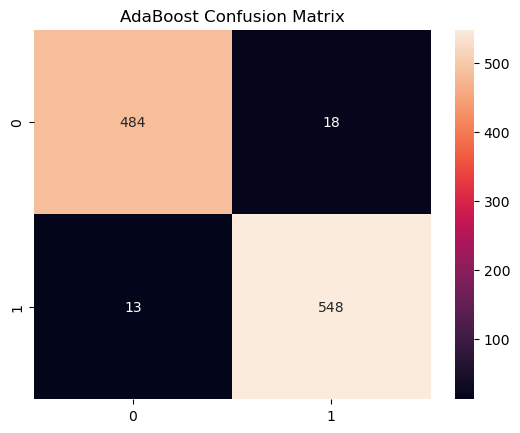

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sb
import matplotlib.pyplot as plt

# Adaboost classifier
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)
adaboost_model.fit(X_train, y_train)

# Make predictions
pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the results
adaboost_cm = confusion_matrix(y_test, pred_adaboost)
adaboost_accuracy = accuracy_score(y_test, pred_adaboost)
adaboost_precision = precision_score(y_test, pred_adaboost)
adaboost_recall = recall_score(y_test, pred_adaboost)
adaboost_f1 = f1_score(y_test, pred_adaboost)

# Display confusion matrix and results
print(f"AdaBoost Metrics:\nAccuracy: {adaboost_accuracy}\nPrecision: {adaboost_precision}\nRecall: {adaboost_recall}\nF1 Score: {adaboost_f1}")

sb.heatmap(adaboost_cm, annot=True, fmt='d')
plt.title("AdaBoost Confusion Matrix")
plt.show()


# Neural Network

Epoch 1/50
133/133 [==============================] - 2s 5ms/step - loss: 0.4057 - accuracy: 0.8593
Epoch 2/50
133/133 [==============================] - 1s 4ms/step - loss: 0.1979 - accuracy: 0.9350
Epoch 3/50
133/133 [==============================] - 1s 4ms/step - loss: 0.1705 - accuracy: 0.9461
Epoch 4/50
133/133 [==============================] - 0s 4ms/step - loss: 0.1563 - accuracy: 0.9494
Epoch 5/50
133/133 [==============================] - 0s 4ms/step - loss: 0.1425 - accuracy: 0.9527
Epoch 6/50
133/133 [==============================] - 1s 4ms/step - loss: 0.1320 - accuracy: 0.9529
Epoch 7/50
133/133 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9572
Epoch 8/50
133/133 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9631
Epoch 9/50
133/133 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9673
Epoch 10/50
133/133 [==============================] - 0s 4ms/step - loss: 0.0871 - accuracy: 0.9685

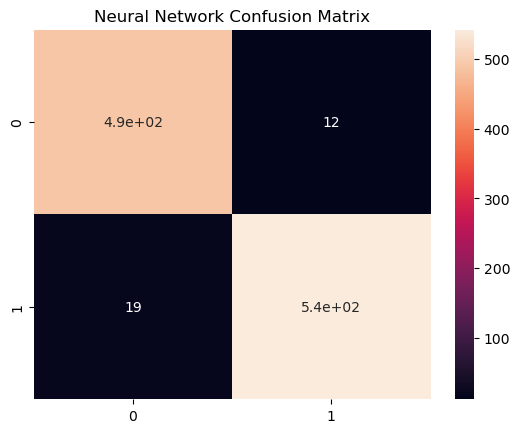

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Use a sequential Keras model
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and fit the data
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# Evaluate and print results and confusion matrix
nn_cm = confusion_matrix(y_test, pred_nn);
nn_accuracy = accuracy_score(y_test, pred_nn)
nn_precision = precision_score(y_test, pred_nn)
nn_recall = recall_score(y_test, pred_nn)
nn_f1 = f1_score(y_test, pred_nn)

print(f"Neural Network Metrics:\nAccuracy: {nn_accuracy}\nPrecision: {nn_precision}\nRecall: {nn_recall}\nF1 Score: {nn_f1}")
sb.heatmap(nn_cm, annot=True)
plt.title("Neural Network Confusion Matrix")
plt.show()

# Compared Performance

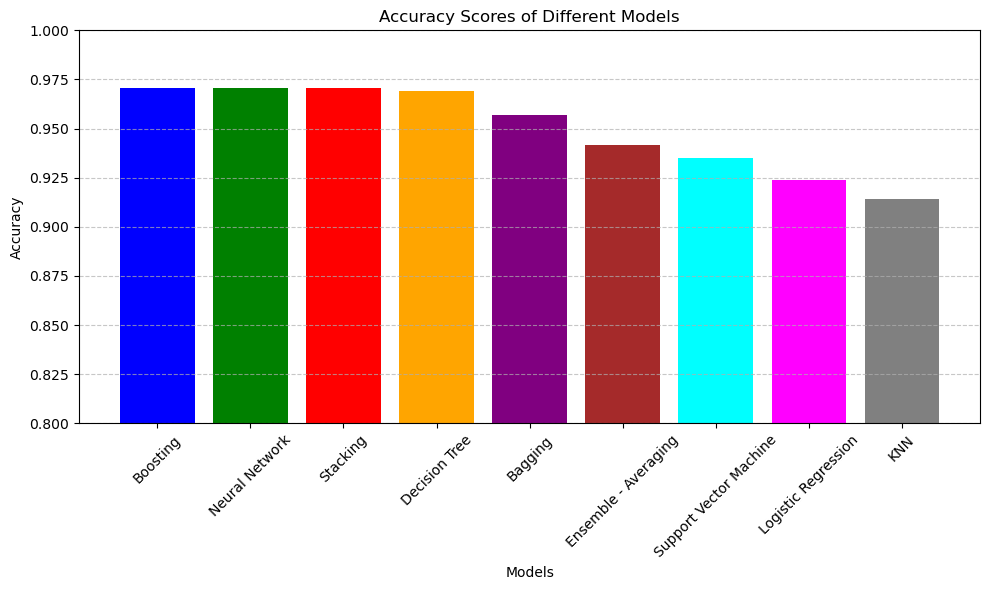

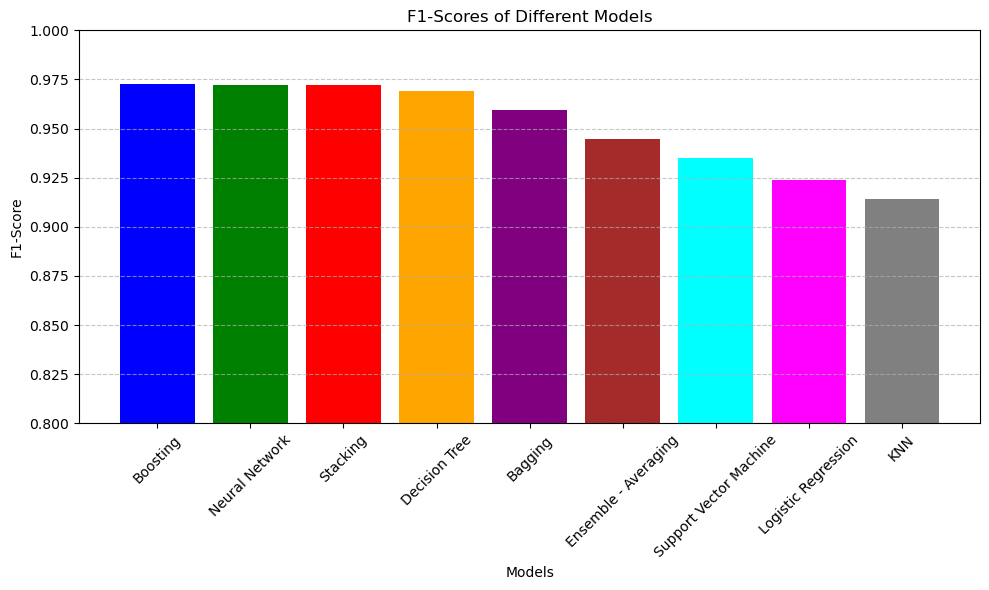

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# All models used
models = [
    'KNN', 'Decision Tree', 'Logistic Regression', 
    'Support Vector Machine', 'Ensemble - Averaging', 
    'Stacking', 'Bagging', 'Neural Network', 'Boosting'
]
accuracies = [
    knn_accuracy, dtc_accuracy, lr_accuracy, 
    svm_accuracy, avg_accuracy, 
    stack_accuracy, bag_accuracy, nn_accuracy, adaboost_accuracy
]
f1_scores = [
    knn_f1, dtc_f1, lr_f1, 
    svm_f1, avg_f1, 
    stack_f1, bag_f1, nn_f1, adaboost_f1
]


# Sorting models by accuracy
sorted_indices = np.argsort(accuracies)[::-1]
sorted_models = np.array(models)[sorted_indices]
sorted_accuracies = np.array(accuracies)[sorted_indices]

sorted_indices_f1 = np.argsort(f1_scores)[::-1]
sorted_models_f1 = np.array(models)[sorted_indices_f1]
sorted_f1 = np.array(f1_scores)[sorted_indices_f1]

plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'gray'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(sorted_models_f1, sorted_f1, color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'gray'])
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Scores of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
model_accuracy_pairs = sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True)

model_f1_pairs = sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True)

# Print the accuracies
print("Model Accuracies:")
for model, accuracy in model_accuracy_pairs:
    print(f"{model}: {accuracy:.4f}")

print("\n")

print("Model F1-Scores:")
for model, f1 in model_f1_pairs:
    print(f"{model}: {f1:.4f}")

Model Accuracies:
Stacking: 0.9708
Neural Network: 0.9708
Boosting: 0.9708
Decision Tree: 0.9690
Bagging: 0.9567
Ensemble - Averaging: 0.9417
Support Vector Machine: 0.9351
Logistic Regression: 0.9238
KNN: 0.9144


Model F1-Scores:
Boosting: 0.9725
Stacking: 0.9722
Neural Network: 0.9722
Decision Tree: 0.9690
Bagging: 0.9594
Ensemble - Averaging: 0.9445
Support Vector Machine: 0.9350
Logistic Regression: 0.9238
KNN: 0.9141


### Model Performance Overview

In this experiment, various machine learning models were evaluated for their accuracy in predicting whether or not a loan would be approved based on personal information. Here's a general overview of the results:

- **Stacking**: The stacking model achieved the highest accuracy, outperforming other models by combining the strengths of multiple base learners.
- **Decision Tree**: The decision tree performed very well, closely following the stacking model in terms of accuracy, due to its ability to capture non-linear relationships.
- **Neural Network**: The neural network also demonstrated strong performance, showing its ability to learn complex patterns in the data.
- **Boosting**: AdaBoost achieved close results, benefiting from the ensemble method that focuses on correcting previous mistakes.
- **Bagging**: Bagging offered good performance but did not perform as well as boosting or stacking models.
- **Ensemble - Averaging**: The ensemble method using simple averaging of base models showed lower accuracy compared to other more sophisticated ensemble methods.
- **Support Vector Machine (SVM)**: SVM achieved solid performance, though it was outperformed by tree-based methods, neural networks, and ensemble methods.
- **Logistic Regression**: Logistic regression provided reasonable accuracy, but it was outperformed by models that capture more complex patterns in the data.
- **K-Nearest Neighbors (KNN)**: KNN performed the least well among the models, as it struggled with high-dimensional or noisy data.

Overall, ensemble methods, particularly stacking and boosting, were the top performers. These models benefit from combining multiple learning algorithms to improve generalization and accuracy.


# Predictions:

In [35]:
def printResults(prediction, name):
    if (prediction == 1):
        print(f"Loan Approved with {name} Classifier!")
    else:
        print(f"Loan Rejected with {name} Classifier!")

In [36]:
# KNN:
printResults(knn.predict(user_input), "KNN")

# Decision Tree:
printResults(dtc.predict(user_input), "Decision Tree")

# Logistic Regression:
printResults(log.predict(user_input), "Logistic Regression")

# SVM:
printResults(svm_svc.predict(user_input), "SVM")

# Averaging:
pred_knn = knn.predict(user_input)
pred_dtc = dtc.predict(user_input)
pred_lr = log.predict(user_input)
pred_svm = svm_svc.predict(user_input)
        
pred_avg = (pred_knn + pred_dtc + pred_lr + pred_svm)/4.0

if (pred_avg > 0.5):
    print("Loan Approved with Basic Averaging Classifier!")
else:
    print("Loan Rejected with Basic Averaging Classifier!")

# Stacking:
printResults(stacking.predict(user_input), "Stacking")

# Bagging:
printResults(bag_avg.predict(user_input), "Bagging")

# Boosting:
printResults(adaboost_model.predict(user_input), "Boosting")

# Neural Network:
printResults(nn_model.predict(user_input), "Neural Network")

Loan Rejected with KNN Classifier!
Loan Rejected with Decision Tree Classifier!
Loan Rejected with Logistic Regression Classifier!
Loan Rejected with SVM Classifier!
Loan Rejected with Basic Averaging Classifier!
Loan Rejected with Stacking Classifier!
Loan Rejected with Bagging Classifier!
Loan Rejected with Boosting Classifier!
1/1 [==============================] - 0s 38ms/step
Loan Rejected with Neural Network Classifier!
